**Normal-Metal - Interface - Superconductor**

In [1]:
import sys; sys.path.append('../')

from scipy.optimize import curve_fit
from libs.models import *
from libs.plot import *
import numpy as np

In [2]:
# Data
T, R_E = np.loadtxt('./output/NM-I-S.txt', usecols=(0, 1), unpack=True)

In [3]:
# Fit
p0         = [10, 0.01, 10, 19, 0.5, 10, 14, 0.5]                                                  # Initial Parameters
bounds     = ([0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 10.0, 0.0], [20, 0.1, 20, 20.0, 1.0, 20, 20.0, 1.0]) # Bounds
popt, pcov = curve_fit(resistance_NMIS_fit, T, R_E, p0=p0, maxfev=5000, bounds=bounds)             # Fit
R0_NM_fit, α_NM_fit, R0_I_fit, TC_I_fit, ΔT_I_fit, R0_S_fit, TC_S_fit, ΔT_S_fit = popt             # Extract Parameters
R_E_fit    = resistance_NMIS_fit(T, *popt)                                                         # Fitted Curve

# Print
print(f'R0_NM = {R0_NM_fit:6.2f} Ω')
print(f'    α = { α_NM_fit:6.2f} 1/K')
print(f' R0_I = { R0_I_fit:6.2f} Ω')
print(f' TC_I = { TC_I_fit:6.2f} K')
print(f' ΔT_I = { ΔT_I_fit:6.2f} K')
print(f' R0_S = { R0_S_fit:6.2f} Ω')
print(f' TC_S = { TC_S_fit:6.2f} K')
print(f' ΔT_S = { ΔT_S_fit:6.2f} K')

R0_NM =  10.01 Ω
    α =   0.02 1/K
 R0_I =  14.88 Ω
 TC_I =  15.20 K
 ΔT_I =   0.10 K
 R0_S =  19.94 Ω
 TC_S =  14.80 K
 ΔT_S =   0.15 K


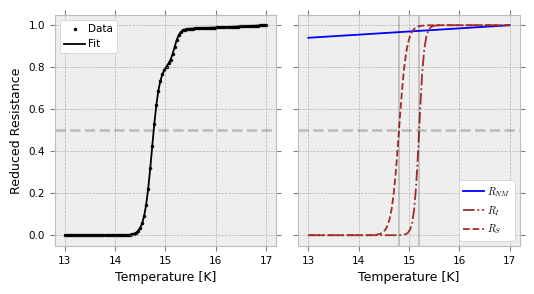

In [4]:
# Plot
fig, ax = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.10)

# 1st Axis
ax[0].scatter(T, R_E/np.max(R_E), color='black', s=4, label='Data')
ax[0].plot(T, R_E_fit/np.max(R_E_fit), color='black', linewidth=lw_, label='Fit')
ax[0].axhline(0.5, color='black', linestyle='--', alpha=alp2_)
ax[0].set_xlabel('Temperature [K]', fontsize=fs2_); ax[0].set_ylabel('Reduced Resistance', fontsize=fs2_)
ax[0].tick_params(axis='x', bottom=True, top=True, labelbottom=True, labeltop=False, direction='out', colors='gray', labelcolor='black')
ax[0].tick_params(axis='y', left=True, right=True, labelleft=True, labelright=False, direction='out', colors='gray', labelcolor='black')
ax[0].set_xlim([12.8, 17.2]); ax[0].set_xticks(np.linspace(13, 17, 5)); ax[0].set_ylim([-0.05, 1.05])
ax[0].legend(facecolor='white', fontsize=fs1_, framealpha=alp1_, handletextpad=0.3).set_zorder(2)

# 2nd Axis
R_NM = resistance_NM(T, R0_NM_fit, α_NM_fit)
R_I  = resistance_I(T, R0_I_fit, TC_I_fit, ΔT_I_fit)
R_S  = resistance_S(T, R0_S_fit, TC_S_fit, ΔT_S_fit)

ax[1].plot(T, R_NM/np.max(R_NM), color='blue', linewidth=lw_, label=r'$R_{NM}$')
ax[1].plot(T, R_I / np.max(R_I), color='brown', linestyle='-.', linewidth=lw_, label=r'$R_{I}$')
ax[1].plot(T, R_S/np.max(R_S), color='brown', linestyle='--', linewidth=lw_, label=r'$R_{S}$')
ax[1].axvline(TC_S_fit, color='black', linewidth=lw_, alpha=alp2_); ax[1].axvline(TC_I_fit, color='black', linewidth=lw_, alpha=alp2_)
ax[1].axhline(0.5, color='black', linestyle='--', alpha=alp2_)
ax[1].tick_params(axis='x', bottom=True, top=True, labelbottom=True, labeltop=False, direction='out', colors='gray', labelcolor='black')
ax[1].tick_params(axis='y', left=True, right=True, labelleft=True, labelright=False, direction='out', colors='gray', labelcolor='black')
ax[1].set_xlabel('Temperature [K]', fontsize=fs2_)
ax[1].set_xlim([12.8, 17.2]); ax[1].set_xticks(np.linspace(13, 17, 5))
ax[1].set_ylim([-0.05, 1.05]); ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0]); ax[1].set_yticklabels([])
ax[1].legend(facecolor='white', fontsize=fs1_, framealpha=alp1_, handletextpad=0.3).set_zorder(2)

plt.show()

In [5]:
# Save
fig.savefig('./output/Figure_NM-I-S_Fit.jpg', bbox_inches='tight', pad_inches=0.2, dpi=300)